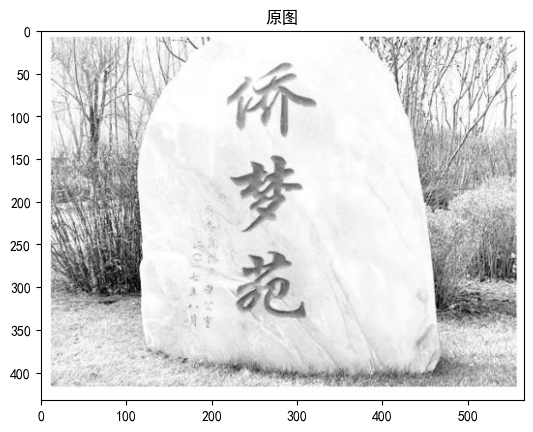

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
image=cv2.imread("./ostu.jpg")
rgbimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)
plt.title("原图")
plt.show()

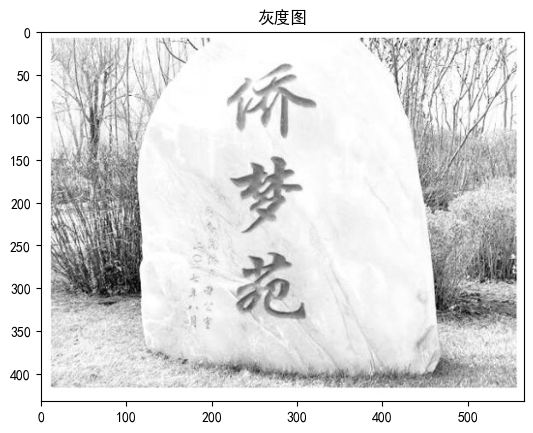

In [8]:
"""
读取灰度图
"""
grayimage=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimage,cmap="gray")
plt.title("灰度图")
plt.show()


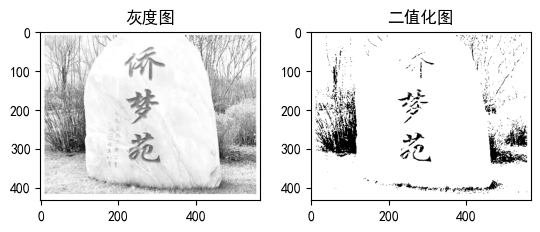

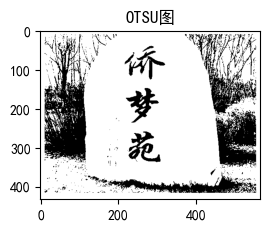

In [9]:
"""
每个实例设置的阈值都是127，这个127是笔者设置的，并不是通过算法计算得到的。对于有些图像，当阈值被设置为127时，得到的效果并不好，这时就需要一个个去尝试，直到找到最合适的阈值。
逐个寻找最合适的阈值不仅工作量大，而且效率低。为此，OpenCV提供了Otsu方法。Otsu方法能够遍历所有可能的阈值，从中找到最合适的阈值。

Otsu方法的语法与threshold()方法的语法基本一致，只不过在为type传递参数时，要多传递一个参数，即cv2.THRESH_OTSU。cv2.THRESH_OTSU的作用就是实现Otsu方法的阈值处理。Otsu方法的语法如下：
     retval, dst = cv2.threshold(src, thresh, maxval, type)
参数说明：

　src：被处理的图像。需要注意的是，该图像需是灰度图像。
　thresh：阈值，且要把阈值设置为0。
　maxval：阈值处理采用的最大值，即255。
　type：阈值处理类型。除在表8.1中选择一种阈值处理类型外，还要多传递一个参数，即cv2.THRESH_OTSU。例如，cv2.THRESH_BINARY+cv2.THRESH_OTSU。
返回值说明：

　retval：由Otsu方法计算得到并使用的最合适的阈值。
　dst：经过阈值处理后的图像。
"""
plt.subplot(221)
plt.imshow(grayimage,cmap="gray")
plt.title("灰度图")
plt.subplot(222)
_,dst=cv2.threshold(grayimage,127,255,cv2.THRESH_BINARY)
plt.imshow(dst,cmap="gray")
plt.title("二值化图")
plt.show()
plt.subplot(223)
_,ostuImg=cv2.threshold(grayimage,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(ostuImg,cmap="gray")
plt.title("OTSU图")
plt.show()